In [36]:
import mysql.connector
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="kr1997",
  database="bourses",
  auth_plugin="mysql_native_password"
    #port=
)
mycursor = mydb.cursor()

In [5]:
# show all tables
mycursor.execute("show FULL tables;")
myresult = mycursor.fetchall()
pd.DataFrame(myresult)

,0,1
0,academie,BASE TABLE
1,bourse,BASE TABLE
2,groupe_candidats,BASE TABLE
3,institut,BASE TABLE
4,region,BASE TABLE
5,secteur,BASE TABLE
6,type_bourse,BASE TABLE
7,type_excellence,BASE TABLE


In [7]:
# display data from table "secteur"
dx = pd.read_sql_query("select *  from secteur;", mydb);
dx

,code_secteur_cnu,secteur_disciplinaire
0,1,Droit et sciences économiques
1,2,Lettres et sciences humaines
2,3,Sciences
3,4,Santé
4,5,STAPS


In [71]:
# show how many groupe_candidats there is 
dx = pd.read_sql_query("select count(*)  from groupe_candidats;", mydb);
dx

,count(*)
0,11474


In [11]:
#show how many beneficiaires that got an excellence scholarship

pd.read_sql_query("select sum(beneficiaires)  from groupe_candidats;", mydb)

,sum(beneficiaires)
0,50898.0


    annee  sum(beneficiaires)
0    1993              1035.0
1    1994              4743.0
2    1995               811.0
3    1996              1299.0
4    1997              2099.0
5    1998              2923.0
6    1999              2335.0
7    2000              2364.0
8    2001              2509.0
9    2002              2744.0
10   2003              2491.0
11   2004              2489.0
12   2005              2571.0
13   2006              3039.0
14   2007              2780.0
15   2008              3258.0
16   2009              3079.0
17   2010              2749.0
18   2011              2675.0
19   2012              2905.0


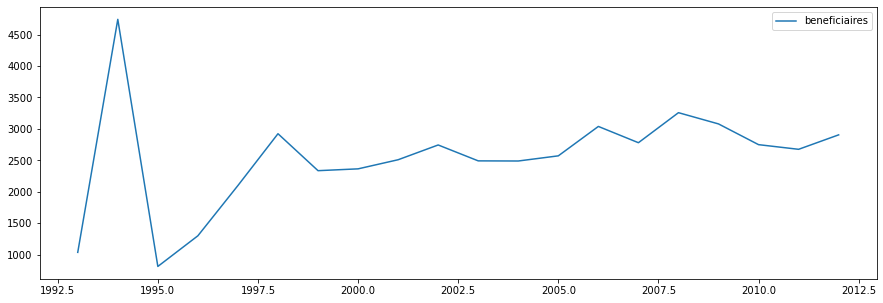

In [54]:
#show how many beneficiaires that got an excellence scholarship per year

dx = pd.read_sql_query("select annee, sum(beneficiaires)  from groupe_candidats group by annee;", mydb)
print(dx)
f = plt.figure(figsize=(15,5))
ax = plt.gca()
ax.plot( dx['annee'],dx['sum(beneficiaires)'],label = 'beneficiaires')
ax.legend()

In [57]:
#show how many beneficiaires that got an excellence scholarship per year

dx = pd.read_sql_query("select sexe, sum(beneficiaires)  from groupe_candidats group by sexe;", mydb)
dx

,sexe,sum(beneficiaires)
0,Femmes,10357.0
1,Hommes,40541.0


<BarContainer object of 2 artists>

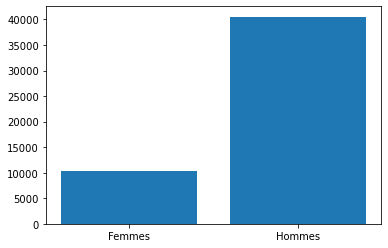

In [63]:
plt.bar(dx["sexe"],dx['sum(beneficiaires)'])

In [35]:
#show how many beneficiaires that got an excellence scholarship per sexe per year

pd.read_sql_query("select sexe,annee, sum(beneficiaires)  from groupe_candidats group by sexe,annee;", mydb)

,sexe,annee,sum(beneficiaires)
0,Femmes,1993,229.0
1,Femmes,1994,750.0
2,Femmes,1995,119.0
3,Femmes,1996,253.0
4,Femmes,1997,380.0
5,Femmes,1998,475.0
6,Femmes,1999,447.0
7,Femmes,2000,500.0
8,Femmes,2001,478.0
9,Femmes,2002,509.0


In [12]:
#show all regions

pd.read_sql_query("select *  from region;", mydb)

,code_region,region
0,0,TOM + Collectivités territoriales
1,1,Guadeloupe
2,4,La Réunion
3,11,Île-de-France
4,21,Champagne-Ardenne
5,22,Picardie
6,23,Haute-Normandie
7,24,Centre
8,25,Basse-Normandie
9,26,Bourgogne


In [17]:
#show academies in region = Île-de-France
pd.read_sql_query("select *  from Academie join region using (code_region) where region = 'Île-de-France';", mydb)

,code_region,code_academie,academie,region
0,11,1,Paris,Île-de-France
1,11,24,Créteil,Île-de-France
2,11,25,Versailles,Île-de-France


In [19]:
#show instituts in Academie = Versailles
pd.read_sql_query("select etablissement,code_uai from Academie join institut using (code_academie) where academie = 'Versailles';", mydb)

,etablissement,code_uai
0,Université de Versailles Saint-Quentin,0781944P
1,Université Paris 11 - Paris Sud,0911101C
2,Université d'Evry Val-d'Essonne,0911975C
3,École nationale supérieure dinformatique pour...,0912266U
4,Université Paris 10 - Nanterre,0921204J
5,École centrale de Paris,0921225G
6,École nationale supérieure de l'électronique e...,0951376E
7,Université de Cergy-Pontoise,0951793H


In [88]:
#show instituts in Academie = Versailles
pd.read_sql_query("select etablissement,code_uai from Academie join institut using (code_academie) where academie = 'Versailles';", mydb)

,etablissement,code_uai
0,Université de Versailles Saint-Quentin,0781944P
1,Université Paris 11 - Paris Sud,0911101C
2,Université d'Evry Val-d'Essonne,0911975C
3,École nationale supérieure dinformatique pour...,0912266U
4,Université Paris 10 - Nanterre,0921204J
5,École centrale de Paris,0921225G
6,École nationale supérieure de l'électronique e...,0951376E
7,Université de Cergy-Pontoise,0951793H


In [25]:
#show Bourse that are both idex and press bourse
pd.read_sql_query("select * from type_excellence where code_idex>0 and code_pres!='0000000X';", mydb)

,code_idex,code_pres,idex,pres
0,2,0333178A,IDEX Bordeaux,PRES Université de Bordeaux
1,3,0912274C,IDEX PARIS SACLAY,PRES UniverSud Paris
2,4,0755575C,IDEX PSL,PRES Paris Sciences et Lettres - Quartier latin
3,5,0755574B,IDEX SUPER,PRES Sorbonne université
4,6,0312758E,IDEX UNITI,PRES Université de Toulouse
5,7,0755598C,IDEX USPC,PRES Sorbonne Paris Cité


In [28]:
#show Bourse that are not idex but are pres bourse
pd.read_sql_query("select * from type_excellence where code_idex=0 and code_pres!='0000000X';", mydb)

,code_idex,code_pres,idex,pres
0,0,0142382N,Hors IDEX,PRES Normandie Université
1,0,0212207K,Hors IDEX,PRES Bourgogne Franche-Comté
2,0,0312758E,Hors IDEX,PRES Université de Toulouse
3,0,0333178A,Hors IDEX,PRES Université de Bordeaux
4,0,0342255S,Hors IDEX,PRES Université Montpellier Sud de France
5,0,0352756F,Hors IDEX,PRES Université européenne de Bretagne
6,0,0371692N,Hors IDEX,PRES Centre-Val de Loire Université
7,0,0383412C,Hors IDEX,PRES Université de Grenoble
8,0,0442665H,Hors IDEX,PRES Université Nantes Angers Maine
9,0,0512141A,Hors IDEX,PRES Picardie-Champagne


In [78]:
#show nbre beneficiaire per secteur disciplinaire
dx = pd.read_sql_query("select secteur_disciplinaire, sum(beneficiaires)  from groupe_candidats join Bourse using (id_bourse) join secteur using (code_secteur_cnu) group by secteur_disciplinaire;", mydb);
dx

,secteur_disciplinaire,sum(beneficiaires)
0,Droit et sciences économiques,3340.0
1,Lettres et sciences humaines,8707.0
2,Sciences,35442.0
3,Santé,2825.0
4,STAPS,584.0


In [81]:
fig = px.bar(dx, x='secteur_disciplinaire', y='sum(beneficiaires)')
fig.show()

In [86]:
#show nbre beneficiaire per type de bourse per sexe
dx = pd.read_sql_query("select groupe_de_corps,sexe, sum(beneficiaires)  from groupe_candidats join Bourse using (id_bourse) join type_bourse using (code_groupe_corps) group by groupe_de_corps,sexe;", mydb);
dx

,groupe_de_corps,sexe,sum(beneficiaires)
0,INDETERMINE,Hommes,47.0
1,INDETERMINE,Femmes,1.0
2,Professeurs et assimilés,Femmes,6066.0
3,Professeurs et assimilés,Hommes,29904.0
4,Maîtres de conférences et assimilés,Femmes,4290.0
5,Maîtres de conférences et assimilés,Hommes,10590.0


In [89]:
fig = px.bar(dx, x="groupe_de_corps", y="sum(beneficiaires)", color="sexe", title="beneficiaire per type de bourse per sexe")
fig.show()

In [100]:
#nbre beneficiaires hommes per type excellence bourse  
dx = pd.read_sql_query("select idex,pres,sum(beneficiaires)  from groupe_candidats join Bourse using (id_bourse) natural join type_excellence where sexe!='femmes' group by idex,pres ;", mydb);
dx


,idex,pres,sum(beneficiaires)
0,Hors IDEX,Hors PRES,3277.0
1,Hors IDEX,PRES Normandie Université,1413.0
2,Hors IDEX,PRES Bourgogne Franche-Comté,1531.0
3,Hors IDEX,PRES Université de Toulouse,55.0
4,Hors IDEX,PRES Université de Bordeaux,396.0
5,Hors IDEX,PRES Université Montpellier Sud de France,1781.0
6,Hors IDEX,PRES Université européenne de Bretagne,1620.0
7,Hors IDEX,PRES Centre-Val de Loire Université,843.0
8,Hors IDEX,PRES Université de Grenoble,2146.0
9,Hors IDEX,PRES Université Nantes Angers Maine,1473.0


In [107]:
#nbre beneficiaires hommes per type excellence bourse
dx = pd.read_sql_query("select idex,pres,sum(beneficiaires)  from groupe_candidats join Bourse using (id_bourse) natural join type_excellence group by idex,pres ;", mydb);
dx

,idex,pres,sum(beneficiaires)
0,Hors IDEX,Hors PRES,3901.0
1,Hors IDEX,PRES Normandie Université,1695.0
2,Hors IDEX,PRES Bourgogne Franche-Comté,1839.0
3,Hors IDEX,PRES Université de Toulouse,60.0
4,Hors IDEX,PRES Université de Bordeaux,456.0
5,Hors IDEX,PRES Université Montpellier Sud de France,2214.0
6,Hors IDEX,PRES Université européenne de Bretagne,1966.0
7,Hors IDEX,PRES Centre-Val de Loire Université,1041.0
8,Hors IDEX,PRES Université de Grenoble,2616.0
9,Hors IDEX,PRES Université Nantes Angers Maine,1693.0


In [111]:

dx = pd.read_sql_query("select etablissement, sum(beneficiaires),geo_localisation  from groupe_candidats natural join Bourse natural join institut group by etablissement;", mydb);
dx

,etablissement,sum(beneficiaires),geo_localisation
0,Observatoire de la côte d'azur,48.0,"43.72632,7.29861"
1,Université de Nice - Sophia-Antipolis,874.0,"43.71383,7.265501"
2,Université de technologie de Troyes,112.0,"48.27235,4.076512"
3,Institut détudes politiques d'Aix-en-Provence,25.0,"43.53149,5.446984"
4,École centrale de Marseille,92.0,"43.24929,5.555178"
...,...,...,...
140,Université d'Antilles-Guyane,97.0,"16.22299,-61.527"
141,Université de La Réunion,138.0,"-20.8776,55.4473"
142,Université de la Nouvelle-Calédonie,13.0,"-22.2686,166.4242"
143,Université française du Pacifique,2.0,"0.0,0.0"


In [124]:
%matplotlib inline

In [126]:
import geoplot as gplt
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

ModuleNotFoundError: No module named 'geoplot'

In [127]:
!pip install geoplot

^C
